In [93]:
import pickle
import numpy as np

In [94]:
EDGE_OP = 'all'
RESULTS_BASE_PATH = 'save'

In [95]:
datasets = [
    {
        'name': 'fb_forum', 
        'context_window_size': 10, 
        'init_picker': 'Exponential', 
        'edge_picker': 'Uniform',
        'weighted_suffix': 'weighted', 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'ia_contact', 
        'context_window_size': 10, 
        'init_picker': 'Exponential', 
        'edge_picker': 'Uniform',
        'weighted_suffix': 'weighted', 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'ia_contacts_hypertext_2009', 
        'context_window_size': 10, 
        'init_picker': 'Exponential',
        'edge_picker': 'Uniform', 
        'weighted_suffix': 'weighted', 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'ia_email_eu', 
        'context_window_size': 10, 
        'init_picker': 'Exponential', 
        'edge_picker': 'Uniform',
        'weighted_suffix': 'weighted', 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'ia_enron_employees', 
        'context_window_size': 10, 
        'init_picker': 'Exponential', 
        'edge_picker': 'Uniform',
        'weighted_suffix': 'weighted', 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'ia_radoslaw_email', 
        'context_window_size': 10, 
        'init_picker': 'Exponential', 
        'edge_picker': 'Uniform',
        'weighted_suffix': 'weighted', 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'soc_sign_bitcoin_alpha', 
        'context_window_size': 10, 
        'init_picker': 'Exponential',
        'edge_picker': 'Uniform', 
        'weighted_suffix': 'weighted', 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    },
    {
        'name': 'wiki_elections', 
        'context_window_size': 10, 
        'init_picker': 'Exponential', 
        'edge_picker': 'Uniform',
        'weighted_suffix': 'weighted', 
        'edge_op': EDGE_OP, 
        'is_directed': 'undirected'
    }
]

In [96]:
file_paths = [f'{RESULTS_BASE_PATH}/{dataset["name"]}_{dataset["init_picker"]}_{dataset["edge_picker"]}_{dataset["context_window_size"]}_{dataset["weighted_suffix"]}_{dataset["edge_op"]}_{dataset["is_directed"]}.pkl' for dataset in datasets]

In [97]:
mean_aucs = []
mean_walk_times = []

for file_path in file_paths:
    result_for_dataset = pickle.load(open(file_path, 'rb'))
    
    mean_aucs.append({
        'new_temporal': np.mean(result_for_dataset['metrics']['new_temporal']['auc_scores']),
        'old_temporal': np.mean(result_for_dataset['metrics']['old_temporal']['auc_scores']),
        'node2vec': np.mean(result_for_dataset['metrics']['node2vec']['auc_scores'])
    })
    
    mean_walk_times.append({
        'new_temporal': np.mean(result_for_dataset['metrics']['new_temporal']['walk_times']),
        'old_temporal': np.mean(result_for_dataset['metrics']['old_temporal']['walk_times']),
        'node2vec': np.mean(result_for_dataset['metrics']['node2vec']['walk_times'])
    })

In [98]:
auc_new_temporal = [entry['new_temporal'] for entry in mean_aucs]
auc_old_temporal = [entry['old_temporal'] for entry in mean_aucs]
auc_node2vec = [entry['node2vec'] for entry in mean_aucs]

walk_new_temporal = [entry['new_temporal'] for entry in mean_walk_times]
walk_old_temporal = [entry['old_temporal'] for entry in mean_walk_times]
walk_node2vec = [entry['node2vec'] for entry in mean_walk_times]

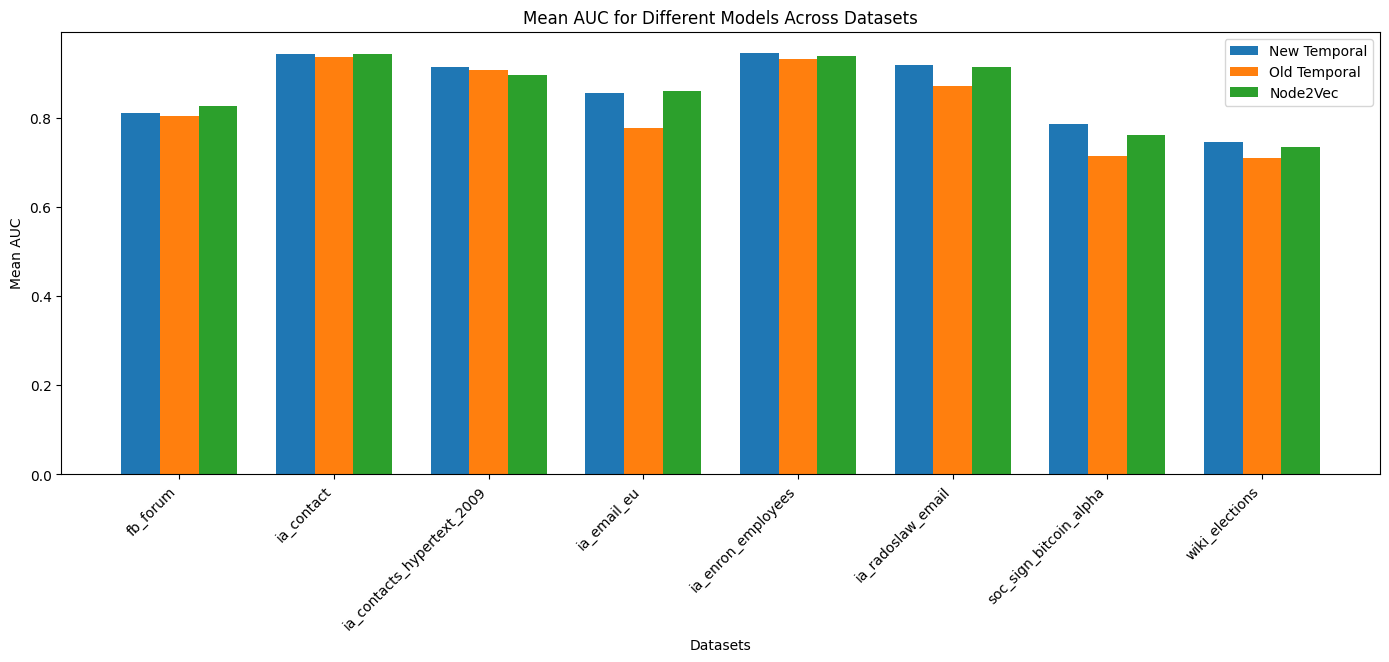

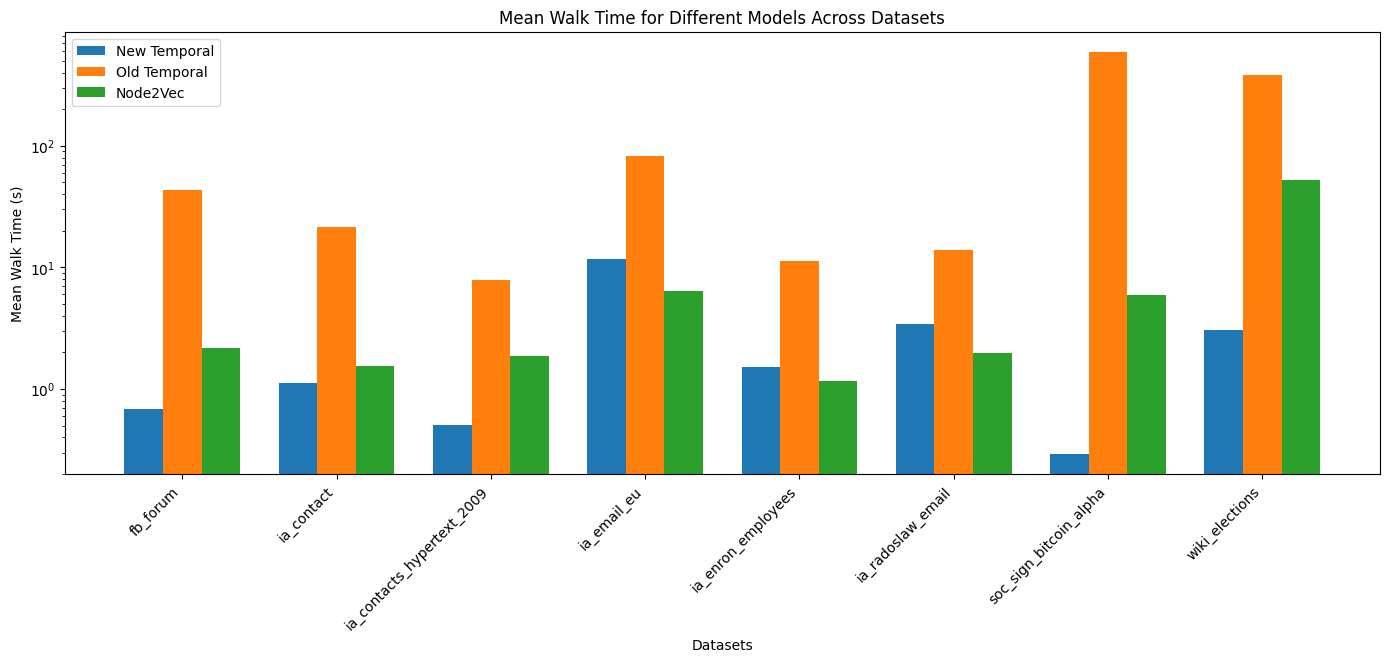

In [99]:
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.25
dataset_names = [dataset['name'] for dataset in datasets]
x = np.arange(len(datasets))

# Plotting AUC bar chart
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width, auc_new_temporal, width=bar_width, label='New Temporal')
plt.bar(x, auc_old_temporal, width=bar_width, label='Old Temporal')
plt.bar(x + bar_width, auc_node2vec, width=bar_width, label='Node2Vec')

plt.xlabel('Datasets')
plt.ylabel('Mean AUC')
plt.title('Mean AUC for Different Models Across Datasets')
plt.xticks(x, dataset_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin
plt.show()

# Plotting Walk Time bar chart
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width, walk_new_temporal, width=bar_width, label='New Temporal')
plt.bar(x, walk_old_temporal, width=bar_width, label='Old Temporal')
plt.bar(x + bar_width, walk_node2vec, width=bar_width, label='Node2Vec')

plt.xlabel('Datasets')
plt.ylabel('Mean Walk Time (s)')
plt.title('Mean Walk Time for Different Models Across Datasets')
plt.xticks(x, dataset_names, rotation=45, ha='right')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin
plt.show()

In [100]:
import pandas as pd

auc_df = pd.DataFrame({
    'Dataset': dataset_names,
    'AUC_New_Temporal': auc_new_temporal,
    'AUC_Old_Temporal': auc_old_temporal,
    'AUC_Node2Vec': auc_node2vec,
})

auc_df = auc_df.round(2)

walk_time_df = pd.DataFrame({
    'Dataset': dataset_names,
    'WalkTime_New_Temporal': walk_new_temporal,
    'WalkTime_Old_Temporal': walk_old_temporal,
    'WalkTime_Node2Vec': walk_node2vec
})

walk_time_df = walk_time_df.round(2)

In [129]:
auc_df

,Dataset,AUC_New_Temporal,AUC_Old_Temporal,AUC_Node2Vec
0,fb_forum,0.81,0.80,0.83
1,ia_contact,0.94,0.94,0.94
2,ia_contacts_hypertext_2009,0.91,0.91,0.90
3,ia_email_eu,0.85,0.78,0.86
4,ia_enron_employees,0.95,0.93,0.94
5,ia_radoslaw_email,0.92,0.87,0.91
6,soc_sign_bitcoin_alpha,0.79,0.71,0.76
7,wiki_elections,0.75,0.71,0.73


In [128]:
walk_time_df

,Dataset,WalkTime_New_Temporal,WalkTime_Old_Temporal,WalkTime_Node2Vec
0,fb_forum,0.69,43.45,2.18
1,ia_contact,1.13,21.42,1.55
2,ia_contacts_hypertext_2009,0.51,7.86,1.87
3,ia_email_eu,11.77,82.88,6.35
4,ia_enron_employees,1.53,11.18,1.15
5,ia_radoslaw_email,3.45,13.92,1.97
6,soc_sign_bitcoin_alpha,0.29,591.28,5.98
7,wiki_elections,3.07,385.20,52.43


In [103]:
alternate_datasets = [
    {
        'name': 'ia_contact', 
        'variants': [
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': 'weighted', 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Linear', 
                'weighted_suffix': 'weighted', 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': 'weighted', 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Linear', 
                'weighted_suffix': 'weighted', 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            }
        ]
    },
    {
        'name': 'ia_contacts_hypertext_2009', 
        'variants': [
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': 'weighted', 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Linear', 
                'weighted_suffix': 'weighted', 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': 'weighted', 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Linear', 
                'weighted_suffix': 'weighted', 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            }
        ]
    },
    {
        'name': 'ia_enron_employees', 
        'variants': [
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': 'weighted', 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Linear', 
                'weighted_suffix': 'weighted', 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': 'weighted', 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Linear', 
                'weighted_suffix': 'weighted', 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            }
        ]
    },
    {
        'name': 'ia_radoslaw_email', 
        'variants': [
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': 'weighted', 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Uniform', 
                'edge_picker': 'Linear', 
                'weighted_suffix': 'weighted', 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Uniform', 
                'weighted_suffix': 'weighted', 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            },
            {
                'context_window_size': 10, 
                'init_picker': 'Linear', 
                'edge_picker': 'Linear', 
                'weighted_suffix': 'weighted', 
                'edge_op': EDGE_OP, 
                'is_directed': 'undirected'
            }
        ]
    }
]

In [104]:
alternate_dataset_results = {}

for dataset in alternate_datasets:
    dataset_name = dataset['name']
    dataset_result = {}
    
    for variant in dataset['variants']:
        file_path = f'{RESULTS_BASE_PATH}/{dataset_name}_{variant["init_picker"]}_{variant["edge_picker"]}_{variant["context_window_size"]}_{variant["weighted_suffix"]}_{variant["edge_op"]}_{variant["is_directed"]}.pkl'
        result_for_variant = pickle.load(open(file_path, 'rb'))
        dataset_result[f'{variant["init_picker"]}_{variant["edge_picker"]}'] = {
            'new_temporal': np.mean(result_for_variant['metrics']['new_temporal']['auc_scores']),
            'old_temporal': np.mean(result_for_variant['metrics']['old_temporal']['auc_scores']),
            'node2vec': np.mean(result_for_variant['metrics']['node2vec']['auc_scores'])
        }
        
    alternate_dataset_results[dataset_name] = dataset_result

In [126]:
import pandas as pd

table_rows = []

for dataset_name, variants in alternate_dataset_results.items():
    for variant_name, metrics in variants.items():
        init_picker, edge_picker = variant_name.split('_')
        
        table_rows.append({
            'F_s': init_picker,
            'F_Gamma': edge_picker,
            f'{dataset_name} (New)': round(metrics['new_temporal'], 3),
            f'{dataset_name} (Old)': round(metrics['old_temporal'], 3),
        })

df = pd.DataFrame(table_rows)

df = df.groupby(['F_s', 'F_Gamma'], as_index=False).first()

In [127]:
df

,F_s,F_Gamma,ia_contact (New),ia_contact (Old),ia_contacts_hypertext_2009 (New),ia_contacts_hypertext_2009 (Old),ia_enron_employees (New),ia_enron_employees (Old),ia_radoslaw_email (New),ia_radoslaw_email (Old)
0,Linear,Linear,0.950,0.936,0.901,0.913,0.947,0.940,0.896,0.884
1,Linear,Uniform,0.949,0.934,0.902,0.914,0.946,0.940,0.897,0.884
2,Uniform,Linear,0.954,0.935,0.893,0.913,0.945,0.939,0.892,0.885
3,Uniform,Uniform,0.956,0.935,0.892,0.913,0.946,0.939,0.894,0.879
